In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# Importing the Keras libraries and packages required to build the artificial neural network (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.metrics import classification_report

In [2]:
# Importing the dataset:
dataset = pd.read_csv('../DATA/breast-cancer-wisconsin-data.csv')      

# Removing unwanted columns
unwanted_features = ['Unnamed: 0', 'id']
dataset.drop(unwanted_features, axis=1,inplace=True)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


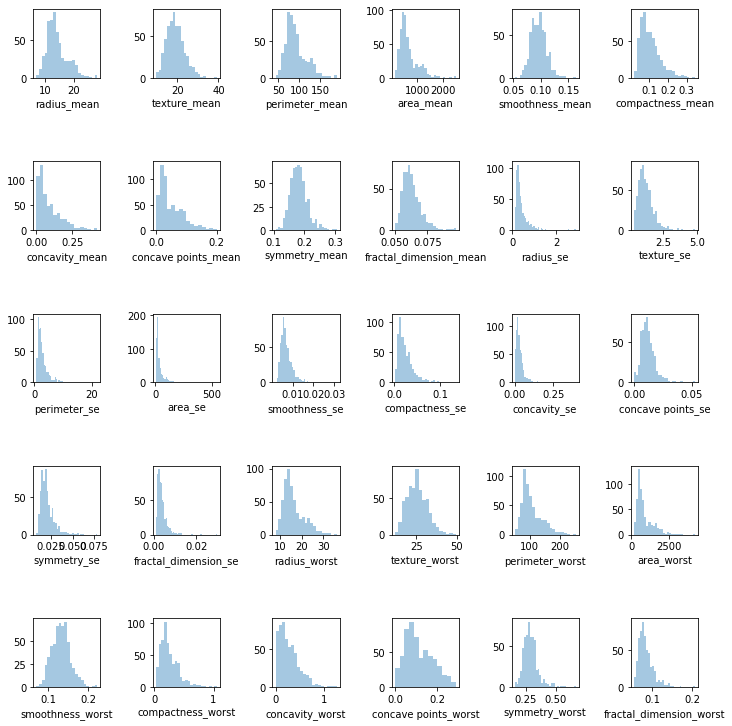

In [3]:
dataset['diagnosis'] = dataset['diagnosis'].astype('category')
dataset['diagnosis'] = dataset['diagnosis'].cat.codes

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
            'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
            'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
            'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
            'concavity_worst', 'concave points_worst', 'symmetry_worst', 
            'fractal_dimension_worst']

fig, axs = plt.subplots(ncols=6, nrows=5, figsize=(10, 10))
index = 0
axs = axs.flatten()
for k,v in dataset[features].items():
    sns.distplot(v, ax=axs[index], kde=False)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [4]:
X = dataset[features].values
y = dataset['diagnosis'].values

# Splitting the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the input variables
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X=X_train)
X_test = sc_X.transform(X_test)

In [5]:
def model_validation(val_y, val_prediction):
    ll = log_loss(y_true=val_y,y_pred=val_prediction)
    cm = confusion_matrix(y_true=val_y,y_pred=val_prediction)
    accuracy = sum(np.diag(cm))/sum(sum(cm))
    return (ll, cm, accuracy)

### Buliding the Neural Network

In [6]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units=15, activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [7]:
classifier.fit(X_train,y_train, batch_size=128, validation_data = (X_test, y_test), 
               epochs=600, verbose=2)

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 - 2s - loss: 0.9055 - accuracy: 0.2857 - val_loss: 0.8233 - val_accuracy: 0.3246
Epoch 2/600
455/455 - 0s - loss: 0.8093 - accuracy: 0.3516 - val_loss: 0.7377 - val_accuracy: 0.3772
Epoch 3/600
455/455 - 0s - loss: 0.7274 - accuracy: 0.3912 - val_loss: 0.6678 - val_accuracy: 0.4474
Epoch 4/600
455/455 - 0s - loss: 0.6600 - accuracy: 0.4637 - val_loss: 0.6099 - val_accuracy: 0.5877
Epoch 5/600
455/455 - 0s - loss: 0.6043 - accuracy: 0.6198 - val_loss: 0.5615 - val_accuracy: 0.7281
Epoch 6/600
455/455 - 0s - loss: 0.5575 - accuracy: 0.7758 - val_loss: 0.5204 - val_accuracy: 0.8421
Epoch 7/600
455/455 - 0s - loss: 0.5156 - accuracy: 0.8681 - val_loss: 0.4838 - val_accuracy: 0.8772
Epoch 8/600
455/455 - 0s - loss: 0.4776 - accuracy: 0.8967 - val_loss: 0.4504 - val_accuracy: 0.9123
Epoch 9/600
455/455 - 0s - loss: 0.4427 - accuracy: 0.9099 - val_loss: 0.4189 - val_accuracy: 0.9211
Epoch 10/600
455/455 - 0s - loss: 0.4116 - ac

Epoch 81/600
455/455 - 0s - loss: 0.0375 - accuracy: 0.9934 - val_loss: 0.0568 - val_accuracy: 0.9825
Epoch 82/600
455/455 - 0s - loss: 0.0368 - accuracy: 0.9934 - val_loss: 0.0568 - val_accuracy: 0.9825
Epoch 83/600
455/455 - 0s - loss: 0.0362 - accuracy: 0.9934 - val_loss: 0.0568 - val_accuracy: 0.9825
Epoch 84/600
455/455 - 0s - loss: 0.0355 - accuracy: 0.9934 - val_loss: 0.0571 - val_accuracy: 0.9825
Epoch 85/600
455/455 - 0s - loss: 0.0349 - accuracy: 0.9934 - val_loss: 0.0572 - val_accuracy: 0.9825
Epoch 86/600
455/455 - 0s - loss: 0.0343 - accuracy: 0.9934 - val_loss: 0.0576 - val_accuracy: 0.9825
Epoch 87/600
455/455 - 0s - loss: 0.0336 - accuracy: 0.9934 - val_loss: 0.0581 - val_accuracy: 0.9825
Epoch 88/600
455/455 - 0s - loss: 0.0330 - accuracy: 0.9934 - val_loss: 0.0583 - val_accuracy: 0.9825
Epoch 89/600
455/455 - 0s - loss: 0.0324 - accuracy: 0.9934 - val_loss: 0.0584 - val_accuracy: 0.9825
Epoch 90/600
455/455 - 0s - loss: 0.0318 - accuracy: 0.9934 - val_loss: 0.0583 - v

Epoch 161/600
455/455 - 0s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9737
Epoch 162/600
455/455 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0827 - val_accuracy: 0.9737
Epoch 163/600
455/455 - 0s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9737
Epoch 164/600
455/455 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0833 - val_accuracy: 0.9737
Epoch 165/600
455/455 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9737
Epoch 166/600
455/455 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0843 - val_accuracy: 0.9737
Epoch 167/600
455/455 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9737
Epoch 168/600
455/455 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9737
Epoch 169/600
455/455 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9737
Epoch 170/600
455/455 - 0s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 

Epoch 241/600
455/455 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9649
Epoch 242/600
455/455 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9649
Epoch 243/600
455/455 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9649
Epoch 244/600
455/455 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9649
Epoch 245/600
455/455 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9649
Epoch 246/600
455/455 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 0.9649
Epoch 247/600
455/455 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1135 - val_accuracy: 0.9649
Epoch 248/600
455/455 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1135 - val_accuracy: 0.9649
Epoch 249/600
455/455 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9649
Epoch 250/600
455/455 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 

Epoch 321/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1355 - val_accuracy: 0.9649
Epoch 322/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1365 - val_accuracy: 0.9649
Epoch 323/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1370 - val_accuracy: 0.9649
Epoch 324/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9649
Epoch 325/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9649
Epoch 326/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9649
Epoch 327/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9649
Epoch 328/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9649
Epoch 329/600
455/455 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1370 - val_accuracy: 0.9649
Epoch 330/600
455/455 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 

455/455 - 0s - loss: 6.1715e-04 - accuracy: 1.0000 - val_loss: 0.1534 - val_accuracy: 0.9649
Epoch 399/600
455/455 - 0s - loss: 6.1056e-04 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9649
Epoch 400/600
455/455 - 0s - loss: 6.0794e-04 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9649
Epoch 401/600
455/455 - 0s - loss: 6.0240e-04 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9649
Epoch 402/600
455/455 - 0s - loss: 5.9653e-04 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9649
Epoch 403/600
455/455 - 0s - loss: 5.9434e-04 - accuracy: 1.0000 - val_loss: 0.1535 - val_accuracy: 0.9649
Epoch 404/600
455/455 - 0s - loss: 5.8958e-04 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9649
Epoch 405/600
455/455 - 0s - loss: 5.8497e-04 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9649
Epoch 406/600
455/455 - 0s - loss: 5.8124e-04 - accuracy: 1.0000 - val_loss: 0.1541 - val_accuracy: 0.9649
Epoch 407/600
455/455 - 0s - loss: 5.7686e-04 - acc

Epoch 475/600
455/455 - 0s - loss: 3.7682e-04 - accuracy: 1.0000 - val_loss: 0.1659 - val_accuracy: 0.9649
Epoch 476/600
455/455 - 0s - loss: 3.7372e-04 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9649
Epoch 477/600
455/455 - 0s - loss: 3.7284e-04 - accuracy: 1.0000 - val_loss: 0.1658 - val_accuracy: 0.9649
Epoch 478/600
455/455 - 0s - loss: 3.6909e-04 - accuracy: 1.0000 - val_loss: 0.1659 - val_accuracy: 0.9649
Epoch 479/600
455/455 - 0s - loss: 3.6691e-04 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 0.9649
Epoch 480/600
455/455 - 0s - loss: 3.6424e-04 - accuracy: 1.0000 - val_loss: 0.1663 - val_accuracy: 0.9649
Epoch 481/600
455/455 - 0s - loss: 3.6274e-04 - accuracy: 1.0000 - val_loss: 0.1663 - val_accuracy: 0.9649
Epoch 482/600
455/455 - 0s - loss: 3.6027e-04 - accuracy: 1.0000 - val_loss: 0.1665 - val_accuracy: 0.9649
Epoch 483/600
455/455 - 0s - loss: 3.5831e-04 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 0.9649
Epoch 484/600
455/455 - 0s - loss: 3.

Epoch 552/600
455/455 - 0s - loss: 2.4698e-04 - accuracy: 1.0000 - val_loss: 0.1777 - val_accuracy: 0.9649
Epoch 553/600
455/455 - 0s - loss: 2.4570e-04 - accuracy: 1.0000 - val_loss: 0.1778 - val_accuracy: 0.9649
Epoch 554/600
455/455 - 0s - loss: 2.4442e-04 - accuracy: 1.0000 - val_loss: 0.1779 - val_accuracy: 0.9649
Epoch 555/600
455/455 - 0s - loss: 2.4341e-04 - accuracy: 1.0000 - val_loss: 0.1780 - val_accuracy: 0.9649
Epoch 556/600
455/455 - 0s - loss: 2.4213e-04 - accuracy: 1.0000 - val_loss: 0.1780 - val_accuracy: 0.9649
Epoch 557/600
455/455 - 0s - loss: 2.4097e-04 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 0.9649
Epoch 558/600
455/455 - 0s - loss: 2.3957e-04 - accuracy: 1.0000 - val_loss: 0.1783 - val_accuracy: 0.9649
Epoch 559/600
455/455 - 0s - loss: 2.3847e-04 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9649
Epoch 560/600
455/455 - 0s - loss: 2.3761e-04 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9649
Epoch 561/600
455/455 - 0s - loss: 2.

In [8]:
model_loss = pd.DataFrame(classifier.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.905549,0.285714,0.823280,0.324561
1,0.809343,0.351648,0.737655,0.377193
2,0.727426,0.391209,0.667826,0.447368
3,0.660032,0.463736,0.609923,0.587719
4,0.604325,0.619780,0.561457,0.728070


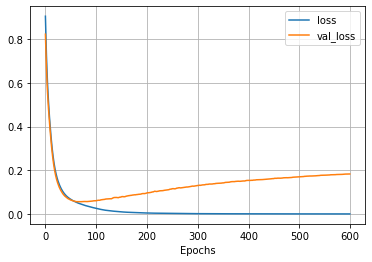

In [9]:
ax = model_loss.loc[:, ['loss', 'val_loss']].plot(grid=True);
ax.set_xlabel('Epochs');
# model_loss.loc[:, ['accuracy', 'val_accuracy']].plot(grid=True)

In [10]:
y_pred = classifier.predict_classes(X_test) 
(ll, cm, accuracy) = model_validation(y_test, y_pred)
print('Log loss: {}\nAccuracy: {}\nConfusion Matrix: \n{}'.format(ll, accuracy, cm))
print(classification_report(y_test,y_pred))

Log loss: 1.2119009190745897
Accuracy: 0.9649122807017544
Confusion Matrix: 
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



* Clearly the model is overfitting, looking at the profile of the validation loss. However the loss on the trainng data saturates after an epoch of 200 but the validation loss seems to keep on increasing.
* Obviously the model has been trained too much! Next we use early stopping to track the val_loss and stop training once it begins increasing too much!
* However use the same profile of the Neural Network.

In [11]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units=15, activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [12]:
classifier.fit(X_train,y_train, batch_size=128, validation_data = (X_test, y_test), 
               epochs=600, callbacks=[early_stop], verbose=2)

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 - 1s - loss: 0.7797 - accuracy: 0.4527 - val_loss: 0.7111 - val_accuracy: 0.4298
Epoch 2/600
455/455 - 0s - loss: 0.6930 - accuracy: 0.5516 - val_loss: 0.6400 - val_accuracy: 0.5263
Epoch 3/600
455/455 - 0s - loss: 0.6167 - accuracy: 0.6527 - val_loss: 0.5768 - val_accuracy: 0.6842
Epoch 4/600
455/455 - 0s - loss: 0.5494 - accuracy: 0.7495 - val_loss: 0.5218 - val_accuracy: 0.7807
Epoch 5/600
455/455 - 0s - loss: 0.4899 - accuracy: 0.8176 - val_loss: 0.4717 - val_accuracy: 0.8772
Epoch 6/600
455/455 - 0s - loss: 0.4401 - accuracy: 0.8681 - val_loss: 0.4268 - val_accuracy: 0.9298
Epoch 7/600
455/455 - 0s - loss: 0.3955 - accuracy: 0.8945 - val_loss: 0.3863 - val_accuracy: 0.9474
Epoch 8/600
455/455 - 0s - loss: 0.3567 - accuracy: 0.9077 - val_loss: 0.3494 - val_accuracy: 0.9386
Epoch 9/600
455/455 - 0s - loss: 0.3211 - accuracy: 0.9231 - val_loss: 0.3161 - val_accuracy: 0.9474
Epoch 10/600
455/455 - 0s - loss: 0.2913 - ac

Epoch 81/600
455/455 - 0s - loss: 0.0292 - accuracy: 0.9934 - val_loss: 0.0720 - val_accuracy: 0.9737
Epoch 82/600
455/455 - 0s - loss: 0.0287 - accuracy: 0.9934 - val_loss: 0.0721 - val_accuracy: 0.9737
Epoch 83/600
455/455 - 0s - loss: 0.0284 - accuracy: 0.9934 - val_loss: 0.0724 - val_accuracy: 0.9737
Epoch 84/600
455/455 - 0s - loss: 0.0280 - accuracy: 0.9934 - val_loss: 0.0726 - val_accuracy: 0.9737
Epoch 85/600
455/455 - 0s - loss: 0.0276 - accuracy: 0.9934 - val_loss: 0.0729 - val_accuracy: 0.9737
Epoch 86/600
455/455 - 0s - loss: 0.0272 - accuracy: 0.9934 - val_loss: 0.0731 - val_accuracy: 0.9737
Epoch 87/600
455/455 - 0s - loss: 0.0269 - accuracy: 0.9934 - val_loss: 0.0734 - val_accuracy: 0.9737
Epoch 00087: early stopping


In [13]:
model_loss = pd.DataFrame(classifier.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.779683,0.452747,0.711147,0.429825
1,0.693045,0.551648,0.640010,0.526316
2,0.616667,0.652747,0.576846,0.684211
3,0.549395,0.749451,0.521761,0.780702
4,0.489881,0.817582,0.471718,0.877193


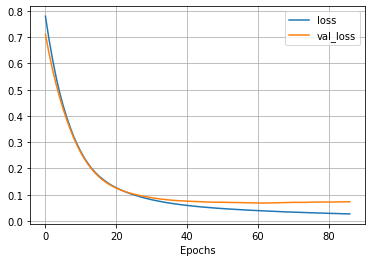

In [14]:
ax = model_loss.loc[:, ['loss', 'val_loss']].plot(grid=True);
ax.set_xlabel('Epochs');
# model_loss.loc[:, ['accuracy', 'val_accuracy']].plot(grid=True)

In [15]:
y_pred = classifier.predict_classes(X_test) 
(ll, cm, accuracy) = model_validation(y_test, y_pred)
print('Log loss: {}\nAccuracy: {}\nConfusion Matrix: \n{}'.format(ll, accuracy, cm))
print(classification_report(y_test,y_pred))

Log loss: 0.9089221822996695
Accuracy: 0.9736842105263158
Confusion Matrix: 
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



* Further we also explore by adding dropout layer in between the dense layers, we keep the same profile of the neural network.

In [16]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=15, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [17]:
classifier.fit(X_train,y_train, batch_size=128, validation_data = (X_test, y_test), 
               epochs=600, callbacks=[early_stop], verbose=2)

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 - 2s - loss: 0.7925 - accuracy: 0.5055 - val_loss: 0.6170 - val_accuracy: 0.6228
Epoch 2/600
455/455 - 0s - loss: 0.6865 - accuracy: 0.6505 - val_loss: 0.5745 - val_accuracy: 0.7193
Epoch 3/600
455/455 - 0s - loss: 0.6216 - accuracy: 0.6264 - val_loss: 0.5376 - val_accuracy: 0.7807
Epoch 4/600
455/455 - 0s - loss: 0.6004 - accuracy: 0.6725 - val_loss: 0.5054 - val_accuracy: 0.8509
Epoch 5/600
455/455 - 0s - loss: 0.5878 - accuracy: 0.7143 - val_loss: 0.4771 - val_accuracy: 0.9035
Epoch 6/600
455/455 - 0s - loss: 0.5400 - accuracy: 0.7121 - val_loss: 0.4512 - val_accuracy: 0.9123
Epoch 7/600
455/455 - 0s - loss: 0.5376 - accuracy: 0.6879 - val_loss: 0.4271 - val_accuracy: 0.9211
Epoch 8/600
455/455 - 0s - loss: 0.5305 - accuracy: 0.7451 - val_loss: 0.4047 - val_accuracy: 0.9386
Epoch 9/600
455/455 - 0s - loss: 0.4793 - accuracy: 0.7912 - val_loss: 0.3828 - val_accuracy: 0.9474
Epoch 10/600
455/455 - 0s - loss: 0.4568 - ac

Epoch 81/600
455/455 - 0s - loss: 0.1151 - accuracy: 0.9692 - val_loss: 0.0710 - val_accuracy: 0.9649
Epoch 82/600
455/455 - 0s - loss: 0.1192 - accuracy: 0.9714 - val_loss: 0.0713 - val_accuracy: 0.9649
Epoch 83/600
455/455 - 0s - loss: 0.1099 - accuracy: 0.9626 - val_loss: 0.0714 - val_accuracy: 0.9649
Epoch 84/600
455/455 - 0s - loss: 0.0848 - accuracy: 0.9692 - val_loss: 0.0716 - val_accuracy: 0.9649
Epoch 85/600
455/455 - 0s - loss: 0.0963 - accuracy: 0.9692 - val_loss: 0.0713 - val_accuracy: 0.9649
Epoch 86/600
455/455 - 0s - loss: 0.0987 - accuracy: 0.9692 - val_loss: 0.0710 - val_accuracy: 0.9649
Epoch 87/600
455/455 - 0s - loss: 0.1102 - accuracy: 0.9692 - val_loss: 0.0710 - val_accuracy: 0.9649
Epoch 88/600
455/455 - 0s - loss: 0.1000 - accuracy: 0.9670 - val_loss: 0.0713 - val_accuracy: 0.9649
Epoch 89/600
455/455 - 0s - loss: 0.0871 - accuracy: 0.9692 - val_loss: 0.0714 - val_accuracy: 0.9649
Epoch 90/600
455/455 - 0s - loss: 0.0852 - accuracy: 0.9802 - val_loss: 0.0717 - v

In [18]:
model_loss = pd.DataFrame(classifier.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.792523,0.505495,0.616972,0.622807
1,0.686469,0.650549,0.574498,0.719298
2,0.621642,0.626374,0.537621,0.780702
3,0.600446,0.672527,0.505437,0.850877
4,0.587767,0.714286,0.477114,0.903509


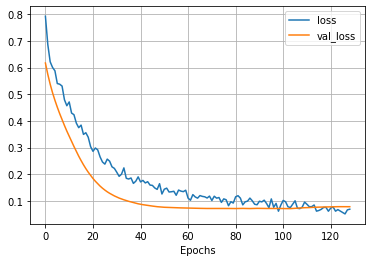

In [19]:
ax = model_loss.loc[:, ['loss', 'val_loss']].plot(grid=True);
ax.set_xlabel('Epochs');
# model_loss.loc[:, ['accuracy', 'val_accuracy']].plot(grid=True)

In [20]:
y_pred = classifier.predict_classes(X_test) 
(ll, cm, accuracy) = model_validation(y_test, y_pred)
print('Log loss: {}\nAccuracy: {}\nConfusion Matrix: \n{}'.format(ll, accuracy, cm))
print(classification_report(y_test,y_pred))

Log loss: 0.9089291963122152
Accuracy: 0.9736842105263158
Confusion Matrix: 
[[69  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

